In [1]:
pip install catboost xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay




from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

1.EDA

1.1 Data Exploration

In [3]:
df = pd.read_csv('Dataset - Updated.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1205 non-null   int64  
 1   Systolic BP             1200 non-null   float64
 2   Diastolic               1201 non-null   float64
 3   BS                      1203 non-null   float64
 4   Body Temp               1205 non-null   int64  
 5   BMI                     1187 non-null   float64
 6   Previous Complications  1203 non-null   float64
 7   Preexisting Diabetes    1203 non-null   float64
 8   Gestational Diabetes    1205 non-null   int64  
 9   Mental Health           1205 non-null   int64  
 10  Heart Rate              1203 non-null   float64
 11  Risk Level              1187 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 113.1+ KB


In [5]:
df.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low


1.2 Data Cleaning

In [6]:
df.isnull().sum()

,0
Age,0
Systolic BP,5
Diastolic,4
BS,2
Body Temp,0
BMI,18
Previous Complications,2
Preexisting Diabetes,2
Gestational Diabetes,0
Mental Health,0


In [7]:
df.dropna(inplace=True)

In [8]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape[0])

number of duplicate rows:  18


In [9]:
df=df.drop_duplicates()

1.3 Data Visualization

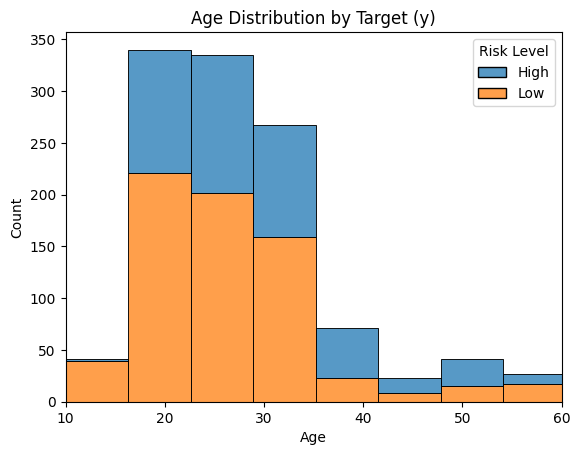

In [10]:
sns.histplot(data=df, x='Age', hue='Risk Level', bins=50, kde=False, multiple='stack')
plt.title('Age Distribution by Target (y)')
plt.xlim(10, 60)

plt.show()


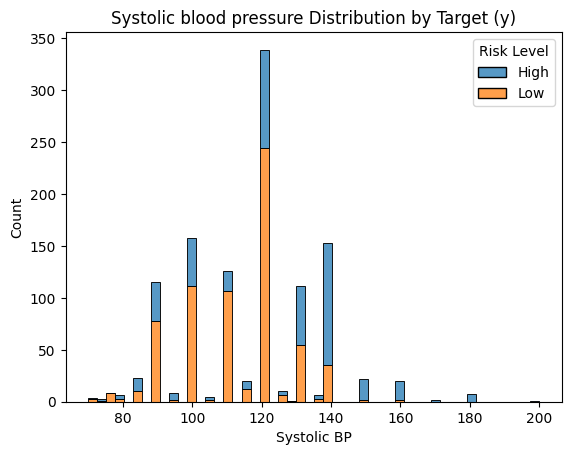

In [11]:
sns.histplot(data=df, x='Systolic BP', hue='Risk Level', bins=50, kde=False, multiple='stack')
plt.title('Systolic blood pressure Distribution by Target (y)')

plt.show()

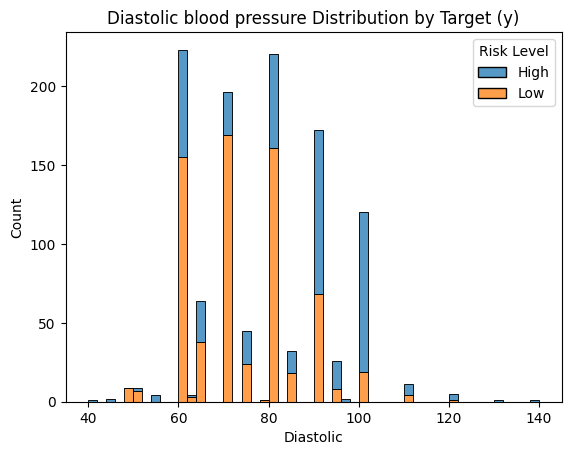

In [12]:
sns.histplot(data=df, x='Diastolic', hue='Risk Level', bins=50, kde=False, multiple='stack')
plt.title('Diastolic blood pressure Distribution by Target (y)')

plt.show()

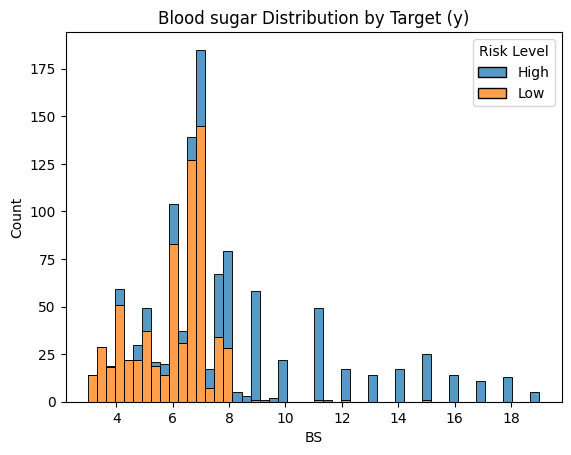

In [13]:
sns.histplot(data=df, x='BS', hue='Risk Level', bins=50, kde=False, multiple='stack')
plt.title('Blood sugar Distribution by Target (y)')

plt.show()

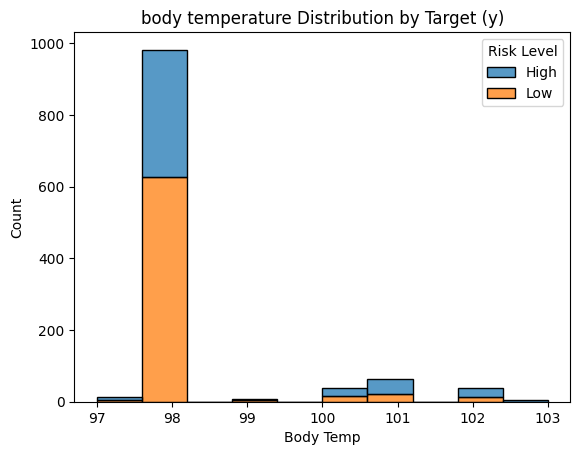

In [14]:
sns.histplot(data=df, x='Body Temp', hue='Risk Level', bins=10, kde=False, multiple='stack')
plt.title('body temperature Distribution by Target (y)')

plt.show()

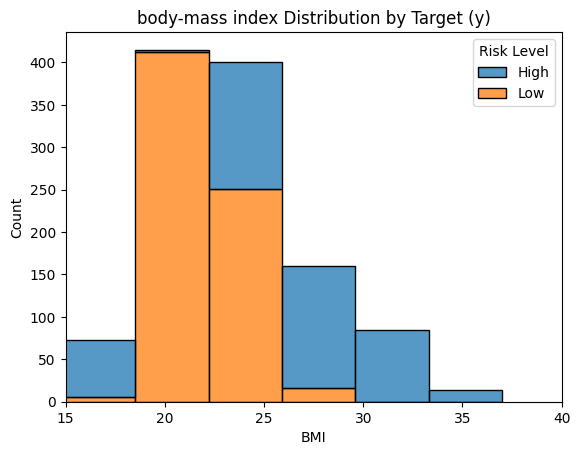

In [15]:
sns.histplot(data=df, x='BMI', hue='Risk Level', bins=10, kde=False, multiple='stack')
plt.title('body-mass index Distribution by Target (y)')
plt.xlim(15,40)
plt.show()

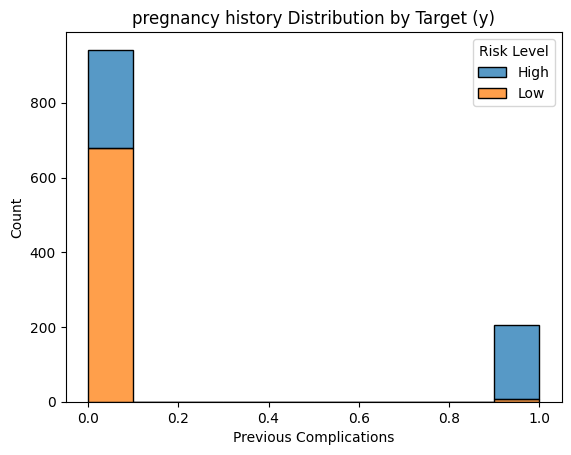

In [16]:
sns.histplot(data=df, x='Previous Complications', hue='Risk Level', bins=10, kde=False, multiple='stack')
plt.title('pregnancy history Distribution by Target (y)')

plt.show()

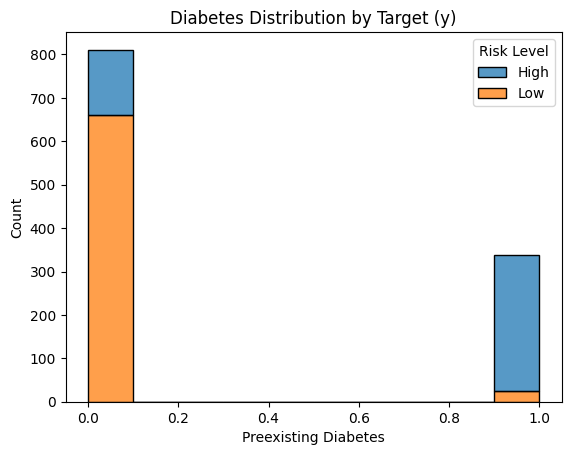

In [17]:
sns.histplot(data=df, x='Preexisting Diabetes', hue='Risk Level', bins=10, kde=False, multiple='stack')
plt.title('Diabetes Distribution by Target (y)')

plt.show()

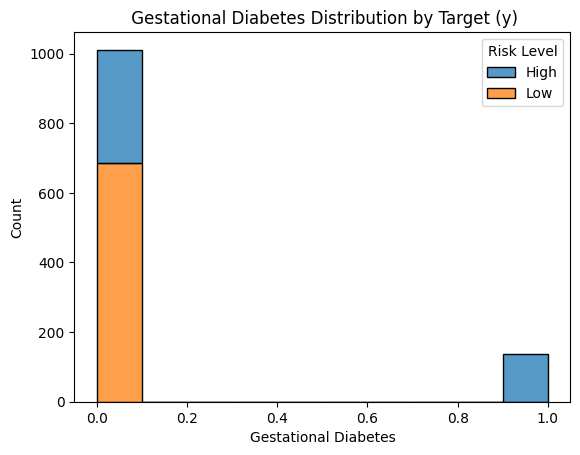

In [18]:
sns.histplot(data=df, x='Gestational Diabetes', hue='Risk Level', bins=10, kde=False, multiple='stack')
plt.title(' Gestational Diabetes Distribution by Target (y)')

plt.show()

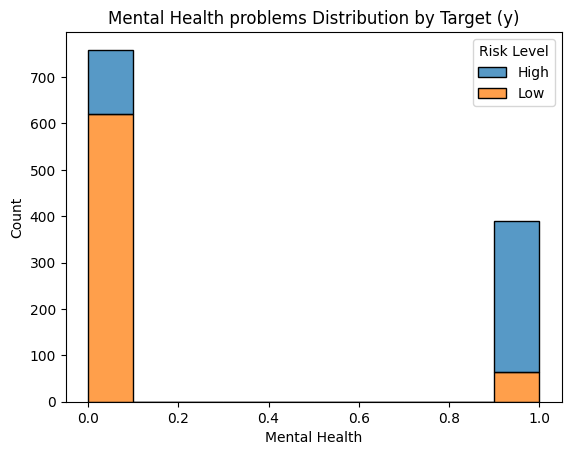

In [19]:
sns.histplot(data=df, x='Mental Health', hue='Risk Level', bins=10, kde=False, multiple='stack')
plt.title('Mental Health problems Distribution by Target (y)')

plt.show()

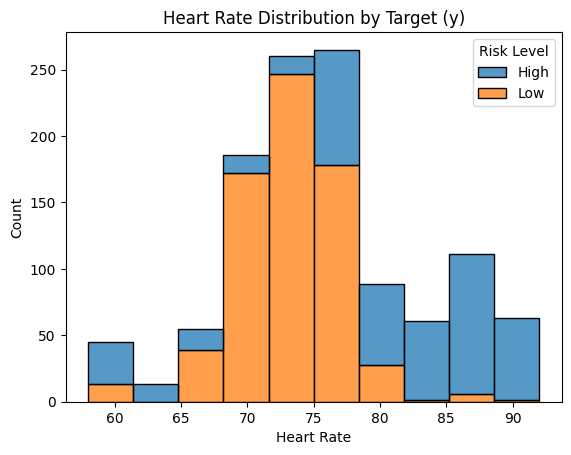

In [20]:
sns.histplot(data=df, x='Heart Rate', hue='Risk Level', bins=10, kde=False, multiple='stack')
plt.title('Heart Rate Distribution by Target (y)')

plt.show()

1.4 Correaltion Analysis

In [21]:
df['Risk Level'] = df['Risk Level'].map({ 'High': 1, 'Low': 0,})
#one hot encoding

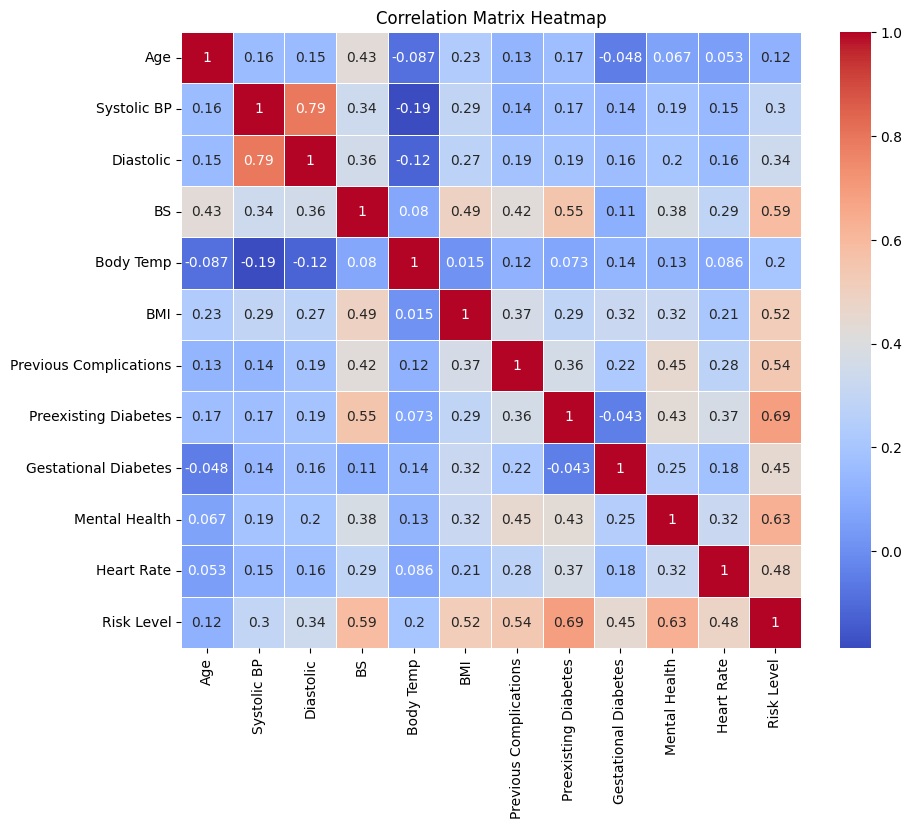

In [22]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

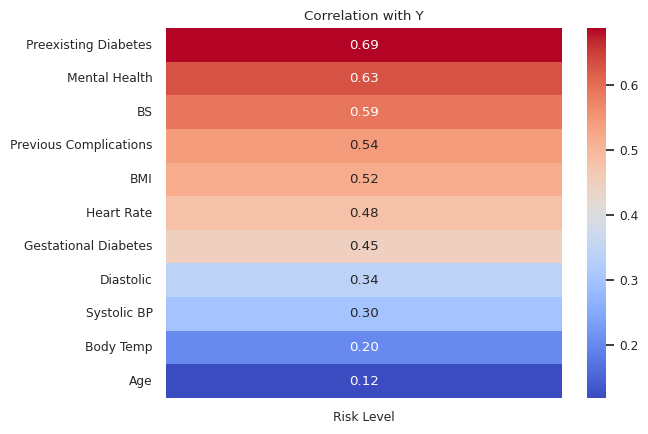

In [23]:
corr = df.corr()
target_corr = corr['Risk Level'].drop('Risk Level')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Y')
plt.show()

2. Data processing

Text(0.5, 1.0, 'Распределение целевой переменной')

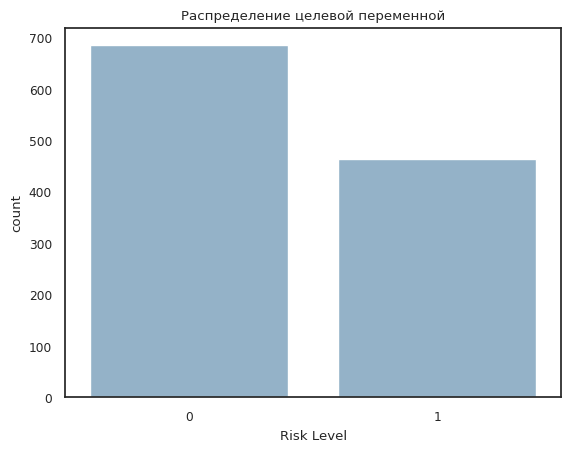

In [24]:
sns.countplot(x='Risk Level', data=df)
plt.title('Распределение целевой переменной')#disbalanced data

In [25]:
X = df.drop('Risk Level', axis=1)
y = df['Risk Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts()) #balancing

Class distribution after SMOTE:
Risk Level
0    541
1    541
Name: count, dtype: int64


In [26]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

3. Model Building

3.1 Logistic Regression

Confusion Matrix:
[[139   5]
 [  3  83]]


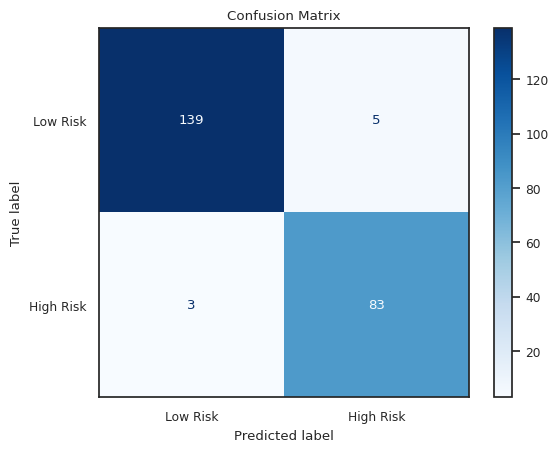


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       144
           1       0.94      0.97      0.95        86

    accuracy                           0.97       230
   macro avg       0.96      0.97      0.96       230
weighted avg       0.97      0.97      0.97       230

Accuracy: 0.97
Precision: 0.94
Recall: 0.97
F1 Score: 0.95


In [27]:
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train_resampled)

y_pred_lr = log_reg.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['Low Risk', 'High Risk'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.2f}")

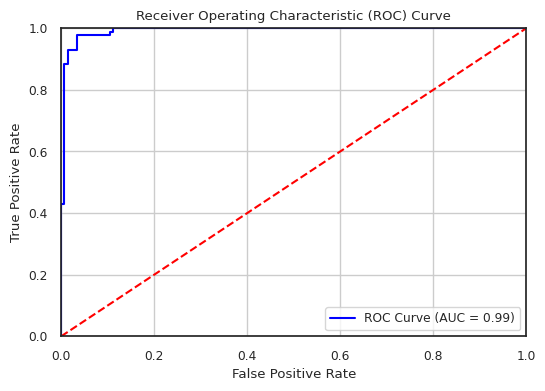

In [28]:
# ROC AUC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_roc_curve(log_reg, X_test_scaled, y_test)

3.2 Decision Tree

Confusion Matrix:
[[142   2]
 [  5  81]]


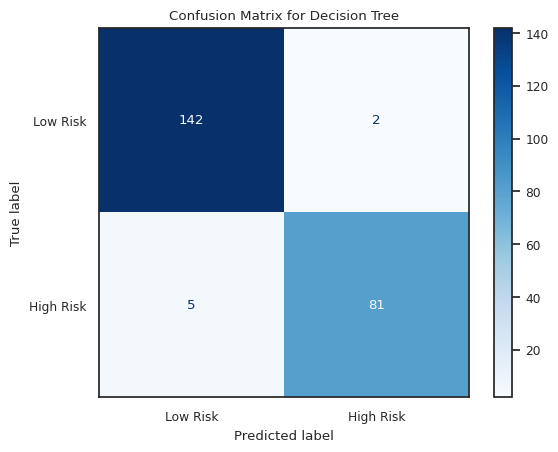


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       144
           1       0.98      0.94      0.96        86

    accuracy                           0.97       230
   macro avg       0.97      0.96      0.97       230
weighted avg       0.97      0.97      0.97       230

Accuracy: 0.97
Precision: 0.98
Recall: 0.94
F1 Score: 0.96


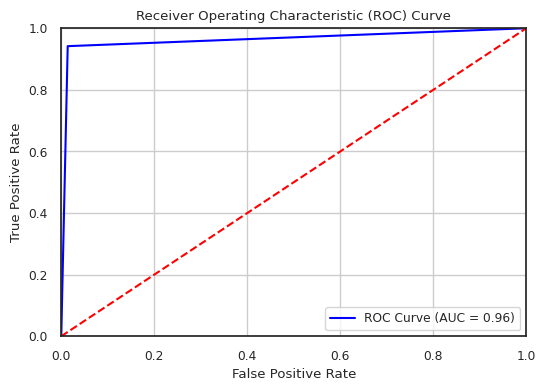

In [29]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train_resampled)

y_pred_dt = dt_classifier.predict(X_test_scaled)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt,
                                  display_labels=['Low Risk', 'High Risk'])
disp_dt.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Results
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.2f}")

plot_roc_curve(dt_classifier, X_test_scaled, y_test)

Catboost

Learning rate set to 0.010655
0:	learn: 0.6750379	total: 49.5ms	remaining: 49.4s
1:	learn: 0.6536307	total: 62.1ms	remaining: 31s
2:	learn: 0.6329284	total: 70.9ms	remaining: 23.6s
3:	learn: 0.6167367	total: 77.2ms	remaining: 19.2s
4:	learn: 0.6009484	total: 88.7ms	remaining: 17.6s
5:	learn: 0.5869028	total: 99.4ms	remaining: 16.5s
6:	learn: 0.5720193	total: 105ms	remaining: 14.9s
7:	learn: 0.5579013	total: 110ms	remaining: 13.6s
8:	learn: 0.5432111	total: 118ms	remaining: 12.9s
9:	learn: 0.5272155	total: 125ms	remaining: 12.3s
10:	learn: 0.5113272	total: 139ms	remaining: 12.5s
11:	learn: 0.4970669	total: 160ms	remaining: 13.2s
12:	learn: 0.4856510	total: 168ms	remaining: 12.8s
13:	learn: 0.4707410	total: 183ms	remaining: 12.9s
14:	learn: 0.4559917	total: 191ms	remaining: 12.5s
15:	learn: 0.4437586	total: 200ms	remaining: 12.3s
16:	learn: 0.4308603	total: 204ms	remaining: 11.8s
17:	learn: 0.4192277	total: 219ms	remaining: 12s
18:	learn: 0.4084962	total: 226ms	remaining: 11.7s
19:	learn

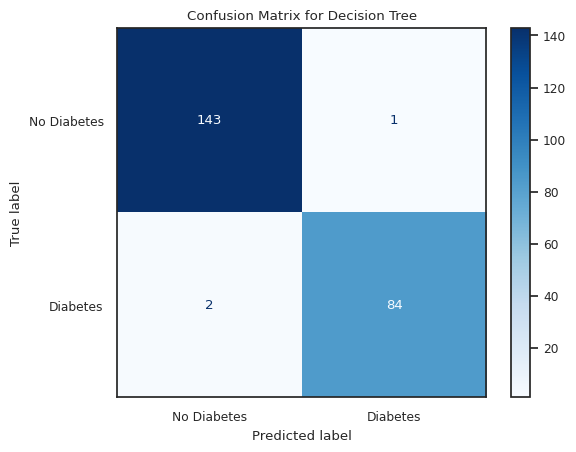


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.99      0.98      0.98        86

    accuracy                           0.99       230
   macro avg       0.99      0.98      0.99       230
weighted avg       0.99      0.99      0.99       230

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
F1 Score: 0.98


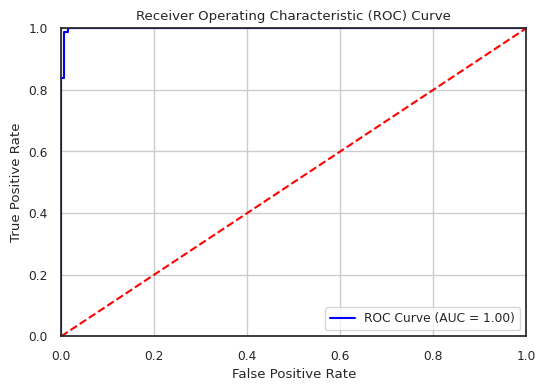

In [30]:
# Model Evaluation

cb_classifier = CatBoostClassifier(random_state=42)
cb_classifier.fit(X_train_scaled, y_train_resampled)

y_pred_cb = cb_classifier.predict(X_test_scaled)

# Confusion Matrix
conf_matrix_cb = confusion_matrix(y_test, y_pred_cb)
print("Confusion Matrix:")
print(conf_matrix_cb)

disp_cb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cb,
                                  display_labels=['No Diabetes', 'Diabetes'])
disp_cb.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Results
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cb))

print(f"Accuracy: {accuracy_score(y_test, y_pred_cb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_cb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_cb):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_cb):.2f}")

# ROC AUC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_roc_curve(cb_classifier, X_test_scaled, y_test)

In [31]:
#cross validation
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Создание модели
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# Кросс-валидация по F1-метрике
scores = cross_val_score(catboost_model, X, y, cv=5, scoring='f1')
print("F1 scores:", scores)
print("Mean F1:", scores.mean())


F1 scores: [0.99465241 0.9787234  0.95833333 0.95505618 0.87719298]
Mean F1: 0.9527916612474371


| Model                   | Accuracy | Precision | Recall   | F1 Score |
| ----------------------- | -------- | --------- | -------- | -------- |
| **Logistic Regression** | 0.97     | 0.94      | 0.97     | 0.95     |
| **Decision Tree**       | 0.97     | 0.98      | 0.94     | 0.96     |
| **CatBoost**            | **0.99** | **0.99**  | **0.98** | **0.98** |


                   Feature  Importance
5                      BMI   24.793259
7     Preexisting Diabetes   20.314856
8     Gestational Diabetes   12.023757
10              Heart Rate   10.459837
3                       BS    8.749645
9            Mental Health    8.687392
1              Systolic BP    3.999823
6   Previous Complications    3.848873
0                      Age    3.637556
2                Diastolic    2.647538


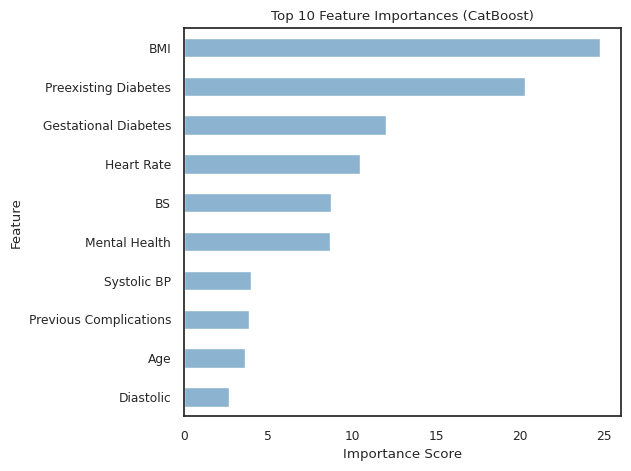

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Обученная модель (пример)
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Получаем важности признаков
importance = model.get_feature_importance()
features = X_train.columns

# Создаем DataFrame
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

# Сортируем и берём топ-10
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)

# Печатаем таблицу
print(top_features)

# Визуализация
top_features.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (CatBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [33]:
top_10_features = top_features['Feature'].tolist()
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

model = CatBoostClassifier(verbose=0)
model.fit(X_train_top10, y_train)
preds = model.predict(X_test_top10)


Learning rate set to 0.010655
0:	learn: 0.6750379	total: 2.15ms	remaining: 2.15s
1:	learn: 0.6536307	total: 3.85ms	remaining: 1.92s
2:	learn: 0.6329284	total: 5.55ms	remaining: 1.85s
3:	learn: 0.6167367	total: 7.17ms	remaining: 1.78s
4:	learn: 0.6009484	total: 8.79ms	remaining: 1.75s
5:	learn: 0.5869028	total: 10ms	remaining: 1.66s
6:	learn: 0.5720193	total: 11.5ms	remaining: 1.64s
7:	learn: 0.5579013	total: 13.2ms	remaining: 1.63s
8:	learn: 0.5432111	total: 14.7ms	remaining: 1.62s
9:	learn: 0.5272155	total: 16.4ms	remaining: 1.62s
10:	learn: 0.5113272	total: 17.9ms	remaining: 1.61s
11:	learn: 0.4970669	total: 19.5ms	remaining: 1.6s
12:	learn: 0.4856510	total: 21.2ms	remaining: 1.6s
13:	learn: 0.4707410	total: 22.7ms	remaining: 1.6s
14:	learn: 0.4559917	total: 24.4ms	remaining: 1.6s
15:	learn: 0.4437586	total: 26ms	remaining: 1.6s
16:	learn: 0.4308603	total: 27.2ms	remaining: 1.57s
17:	learn: 0.4192277	total: 28.8ms	remaining: 1.57s
18:	learn: 0.4084962	total: 30.4ms	remaining: 1.57s
1

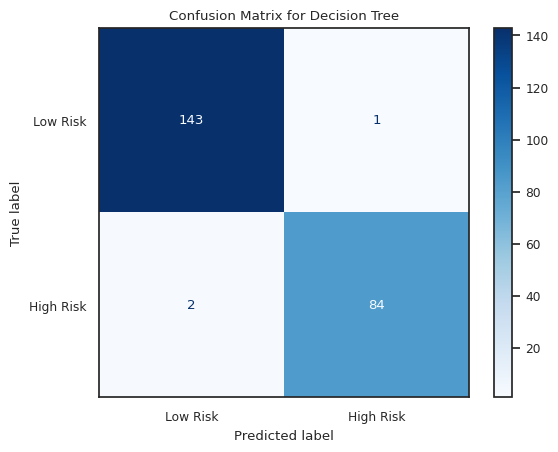


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.99      0.98      0.98        86

    accuracy                           0.99       230
   macro avg       0.99      0.98      0.99       230
weighted avg       0.99      0.99      0.99       230

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
F1 Score: 0.98


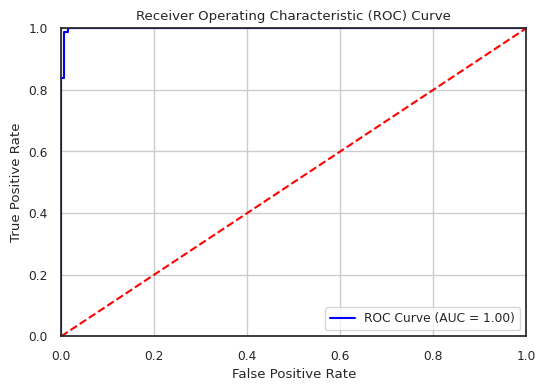

In [34]:
# Model Evaluation

cb_classifier = CatBoostClassifier(random_state=42)
cb_classifier.fit(X_train_scaled, y_train_resampled)

y_pred_cb = cb_classifier.predict(X_test_scaled)

# Confusion Matrix
conf_matrix_cb = confusion_matrix(y_test, y_pred_cb)
print("Confusion Matrix:")
print(conf_matrix_cb)

disp_cb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cb,
                                  display_labels=['Low Risk', 'High Risk'])
disp_cb.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Results
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cb))

print(f"Accuracy: {accuracy_score(y_test, y_pred_cb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_cb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_cb):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_cb):.2f}")

plot_roc_curve(cb_classifier, X_test_scaled, y_test)

In [35]:
pip install joblib


In [36]:
from catboost import CatBoostClassifier
import joblib

# 1. Обучаем модель
model = CatBoostClassifier()
model.fit(X_train, y_train)

# 2. Сохраняем модель
joblib.dump(model, "catboost_model.joblib")

Learning rate set to 0.009933
0:	learn: 0.6762001	total: 1.98ms	remaining: 1.97s
1:	learn: 0.6571649	total: 2.95ms	remaining: 1.47s
2:	learn: 0.6368038	total: 4ms	remaining: 1.33s
3:	learn: 0.6198339	total: 4.98ms	remaining: 1.24s
4:	learn: 0.6058916	total: 5.96ms	remaining: 1.19s
5:	learn: 0.5937831	total: 7.06ms	remaining: 1.17s
6:	learn: 0.5773888	total: 7.99ms	remaining: 1.13s
7:	learn: 0.5625928	total: 9.04ms	remaining: 1.12s
8:	learn: 0.5481755	total: 10ms	remaining: 1.11s
9:	learn: 0.5305622	total: 11ms	remaining: 1.09s
10:	learn: 0.5174520	total: 11.9ms	remaining: 1.07s
11:	learn: 0.5024779	total: 12.9ms	remaining: 1.06s
12:	learn: 0.4912949	total: 13.8ms	remaining: 1.05s
13:	learn: 0.4795860	total: 14.8ms	remaining: 1.04s
14:	learn: 0.4657546	total: 15.7ms	remaining: 1.03s
15:	learn: 0.4542903	total: 16.6ms	remaining: 1.02s
16:	learn: 0.4466241	total: 17.6ms	remaining: 1.02s
17:	learn: 0.4377995	total: 18.6ms	remaining: 1.01s
18:	learn: 0.4256657	total: 19.6ms	remaining: 1.01s

['catboost_model.joblib']

In [37]:
import joblib

joblib.dump(model, 'catboost_model.pkl')

['catboost_model.pkl']

In [38]:
model = joblib.load('catboost_model.pkl')
